In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruits/fruits-360/LICENSE
/kaggle/input/fruits/fruits-360/readme.md
/kaggle/input/fruits/fruits-360/papers/fruit_recognition_deep_learning.pdf
/kaggle/input/fruits/fruits-360/Training/Quince/r_305_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/139_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/128_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_239_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/185_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_199_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_287_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/73_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/191_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_306_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/112_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_250_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/64_100.jpg
/kaggle/input/fruits/fruits-360/Training/Quince/r_186

In [2]:
from __future__ import print_function, division
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [3]:
IMAGE_SIZE = [100, 100] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 32


In [4]:
train_path = '../input/fruits/fruits-360/Training'
valid_path = '../input/fruits/fruits-360/Test'

In [5]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [6]:
#number of classes
folders = glob(train_path + '/*')

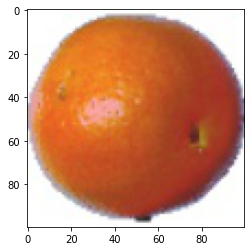

In [7]:
#plotting random image
plt.imshow(image.img_to_array(image.load_img(np.random.choice(image_files))).astype('uint8'))
plt.show()

In [8]:
# adding vgg16 layer with weights initialized from imagenet. iclude_top = False means we will train the regression layer or the final layer ourself, so we are excluding that layer
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 0s 0us/step


In [9]:
#since we do not want to train the vgg16 layer
for layer in vgg.layers:
  layer.trainable = False

In [10]:
vgg.output

<KerasTensor: shape=(None, 3, 3, 512) dtype=float32 (created by layer 'block5_pool')>

In [11]:
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
model = Model(inputs=vgg.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [14]:
from keras.utils import plot_model

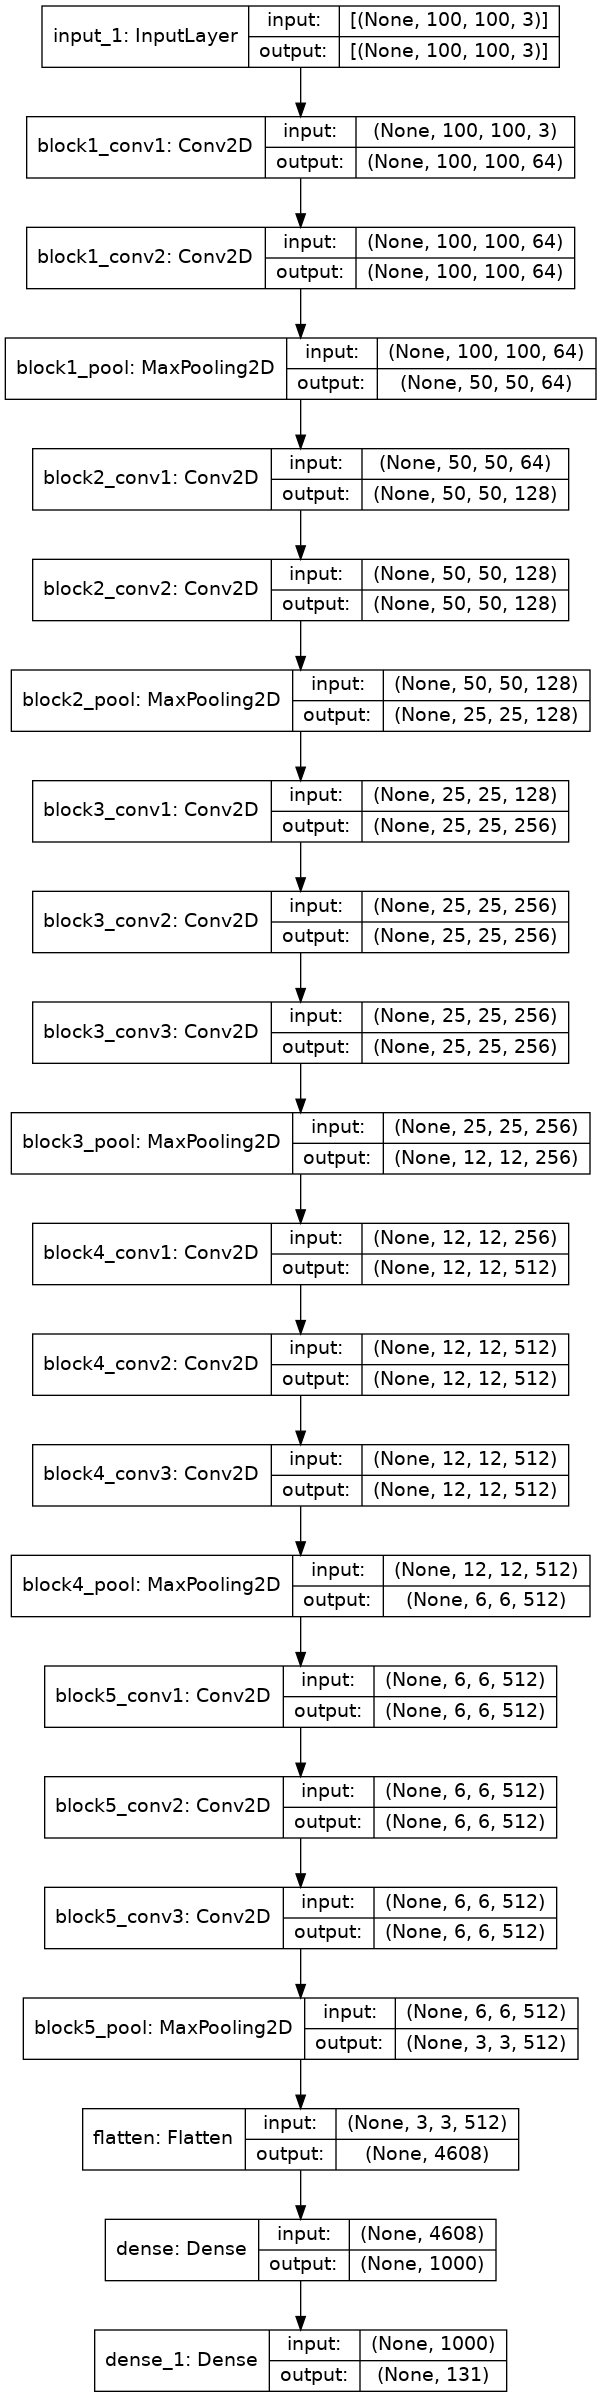

In [15]:
plot_model(model, show_shapes=True)

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [17]:
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [18]:
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)

Found 22688 images belonging to 131 classes.
{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape Wh

In [19]:
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

min: -116.779 max: 151.061


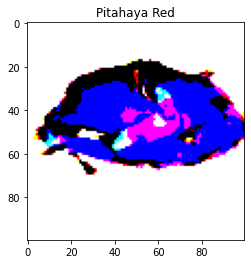

In [20]:
# should be a strangely colored image (due to VGG weights being BGR)
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [21]:
# create generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [23]:
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)


Epoch 1/5
2115/2115 [==============================] - 359s 170ms/step - loss: 0.5576 - accuracy: 0.9606 - val_loss: 2.2695 - val_accuracy: 0.9132
Epoch 2/5
2115/2115 [==============================] - 304s 144ms/step - loss: 0.4117 - accuracy: 0.9732 - val_loss: 1.8248 - val_accuracy: 0.9374
Epoch 3/5
2115/2115 [==============================] - 303s 143ms/step - loss: 0.3463 - accuracy: 0.9796 - val_loss: 1.8850 - val_accuracy: 0.9400
Epoch 4/5
2115/2115 [==============================] - 299s 142ms/step - loss: 0.3067 - accuracy: 0.9826 - val_loss: 2.0228 - val_accuracy: 0.9396
Epoch 5/5
2115/2115 [==============================] - 303s 143ms/step - loss: 0.2856 - accuracy: 0.9852 - val_loss: 1.8438 - val_accuracy: 0.9458


In [24]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [25]:
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 67692
Found 67692 images belonging to 131 classes.
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
[[475   0   0 ...   0   0   0]
 [  0 440   0 ...   0   0   0]
 [  0   0 480 ...   0   0   0]
 ...
 [  0   0   0 ... 469   0   0]
 [  0   0   0 ...   0 735   0]
 [  0   0   0 ...   0   0 475]]
Generating confusion matrix 22688
Found 22688 images belonging to 131 classes.
50
100
150
200
250
300
350
[[134   0   0 ...   0   0   0]
 [  1 127   0 ...   0   0   0]
 [  0   0 159 ...   0   0   0]
 ...
 [  0   0   0 ... 158   0   0]
 [  0   0   0 ...   0 246   0]
 [  0   0   0 ...   0   0 157]]


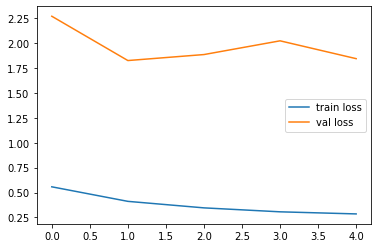

In [26]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


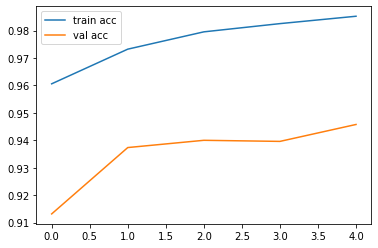

In [27]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [29]:
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future

import itertools
import numpy as np
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


def y2indicator(Y):
  K = len(set(Y))
  N = len(Y)
  I = np.empty((N, K))
  I[np.arange(N), Y] = 1
  return I

Confusion matrix, without normalization
[[475   0   0 ...   0   0   0]
 [  0 440   0 ...   0   0   0]
 [  0   0 480 ...   0   0   0]
 ...
 [  0   0   0 ... 469   0   0]
 [  0   0   0 ...   0 735   0]
 [  0   0   0 ...   0   0 475]]


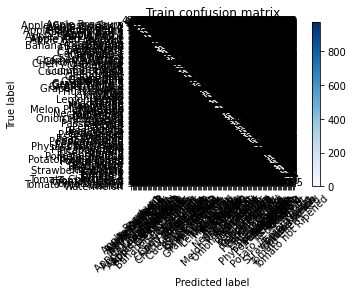

Confusion matrix, without normalization
[[134   0   0 ...   0   0   0]
 [  1 127   0 ...   0   0   0]
 [  0   0 159 ...   0   0   0]
 ...
 [  0   0   0 ... 158   0   0]
 [  0   0   0 ...   0 246   0]
 [  0   0   0 ...   0   0 157]]


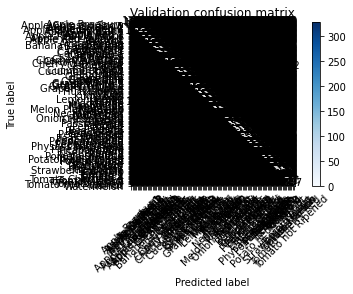

In [30]:
plot_confusion_matrix(cm, labels, title='Train confusion matrix')
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')